In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


In [2]:
# reading the dataset.
data_train = pd.read_csv(r"Bank_dataset/train.csv")

In [3]:
data_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


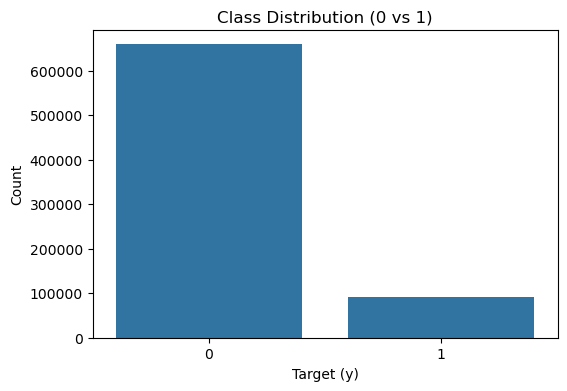

y
0    659512
1     90488
Name: count, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the dataset is balanced
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data_train)
plt.title('Class Distribution (0 vs 1)')
plt.xlabel('Target (y)')
plt.ylabel('Count')
plt.show()

print(data_train['y'].value_counts())

In [6]:
# removing the 'id' column from the dataset.
data_train = data_train.drop(['id'], axis=1, inplace=False)
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [7]:
# remove the result column from the training data.
y_train = data_train['y']
x_train = data_train.drop(['y'], axis=1, inplace=False)

In [8]:
# encode only the text data that inside the file, and skip the data 
#  with numbers.
XT_encoded = pd.get_dummies(x_train)

#we scale the columns data that have numbers so that the model understands.
# there is no affect to the text encoded data.
# we use RobustScaler to avoid the effect of outliers in the data, because if we use StandardScaler
#  It will get affected by the outliers.
robustscaler = RobustScaler()
XT_scaled = robustscaler.fit_transform(XT_encoded)
print("data after scaling: \n", XT_scaled)

data after scaling: 
 [[ 0.2        -0.45107914  0.66666667 ...  0.          0.
   0.        ]
 [-0.06666667 -0.08633094  0.08333333 ...  0.          0.
   0.        ]
 [-0.2        -0.02302158 -0.25       ...  0.          0.
   0.        ]
 ...
 [ 0.73333333 -0.3         0.         ...  0.          0.
   0.        ]
 [-0.46666667 -0.65323741  0.75       ...  0.          0.
   0.        ]
 [ 0.2         0.66546763 -1.08333333 ...  0.          0.
  -1.        ]]


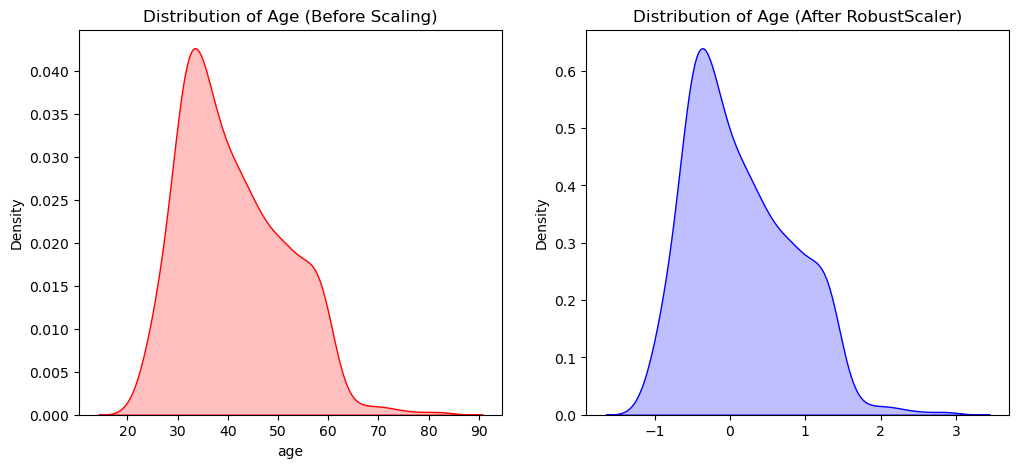

In [9]:
# Plotting the scaling effect on a sample
# We use a sample of 1000 rows so it doesn't freeze your computer
sample_size = 1000

plt.figure(figsize=(12, 5))

# 1. Before Scaling (using the original Age column)
plt.subplot(1, 2, 1)
sns.kdeplot(XT_encoded['age'].iloc[:sample_size], fill=True, color='red')
plt.title('Distribution of Age (Before Scaling)')

# 2. After Scaling
# We access the first column (index 0) of the scaled array, which corresponds to Age
plt.subplot(1, 2, 2)
sns.kdeplot(XT_scaled[:sample_size, 0], fill=True, color='blue')
plt.title('Distribution of Age (After RobustScaler)')

plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(XT_scaled, y_train, test_size=0.2, random_state=42,
                stratify=y_train)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# this will give the nimumber of features.
input_shape = X_train.shape[1]

model = Sequential()

model.add(Dense(128, input_shape=(input_shape,)))
model.add(LeakyReLU(alpha=0.01)) # This is to make the neuron not completely dead.
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) # we put "1" because it will output one probability value.

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])

print("model training:\n")
history = model.fit(
    X_train, y_train,
    epochs = 10, # the number of epochs does not increase a lot after the 10th epoch.
    batch_size = 64,
    validation_data = (X_test, y_test)
)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

c:\Users\hamza\anaconda3\envs\TPCS2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


model training:

Epoch 1/10
9375/9375 [==============================] - 31s 3ms/step - loss: 0.1921 - accuracy: 0.9164 - val_loss: 0.1686 - val_accuracy: 0.9238
Epoch 2/10
9375/9375 [==============================] - 29s 3ms/step - loss: 0.1713 - accuracy: 0.9246 - val_loss: 0.1648 - val_accuracy: 0.9261
Epoch 3/10
9375/9375 [==============================] - 29s 3ms/step - loss: 0.1679 - accuracy: 0.9268 - val_loss: 0.1623 - val_accuracy: 0.9283
Epoch 4/10
9375/9375 [==============================] - 29s 3ms/step - loss: 0.1658 - accuracy: 0.9279 - val_loss: 0.1608 - val_accuracy: 0.9291
Epoch 5/10
9375/9375 [==============================] - 29s 3ms/step - loss: 0.1649 - accuracy: 0.9284 - val_loss: 0.1606 - val_accuracy: 0.9291
Epoch 6/10
9375/9375 [==============================] - 33s 4ms/step - loss: 0.1640 - accuracy: 0.9290 - val_loss: 0.1614 - val_accuracy: 0.9288
Epoch 7/10
9375/9375 [==============================] - 434s 46ms/step - loss: 0.1634 - accuracy: 0.9292 - val_lo

**Predicting the test file:**

In [12]:
data_test = pd.read_csv(r"Bank_dataset/test.csv")
test_id = data_test['id']
data_test = data_test.drop(['id'], axis=1, inplace=False)
test_encoded = pd.get_dummies(data_test)
test_scaled = robustscaler.transform(test_encoded)
prediction = model.predict(test_scaled)
prediction1 = (prediction > 0.5).astype(int)

submission = pd.DataFrame({'id':test_id, 'y':prediction1.flatten()})
submission.to_csv('predicted.csv', index=False)

7813/7813 [==============================] - 13s 2ms/step


4688/4688 [==============================] - 8s 2ms/step
Confusion Matrix:


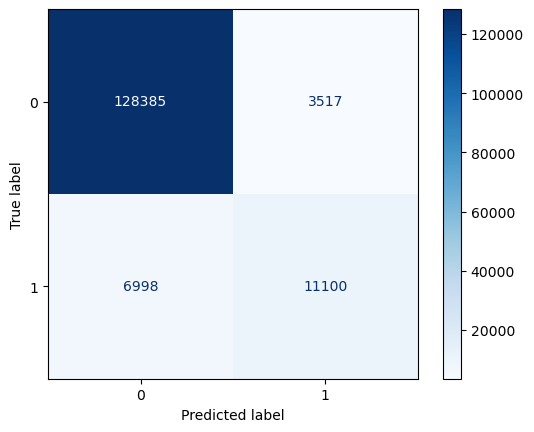

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

val_predictions = model.predict(X_test)
val_predictions_binary = (val_predictions > 0.5).astype(int)
print("Confusion Matrix:")
# why we "val_predictions_binary" and we don't use the "prediction1", because It has Same Size and Same Type (0s and 1s).
cm = confusion_matrix(y_test, val_predictions_binary)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
display.plot(cmap=plt.cm.Blues)
plt.show()